<a href="https://colab.research.google.com/github/prideven/clustering-techniques/blob/main/ClusteringTechniques.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**K-means**

In [2]:

import gdown
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
from sklearn import preprocessing
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D

In [4]:
#to load file from google drive

url='https://drive.google.com/uc?id=1IRQuTNnQIM-a8ZzItIIazrDJ3p3Oh94S'
output= "data.csv"
gdown.download(url,output,quiet=False)

Downloading...
From: https://drive.google.com/uc?id=1IRQuTNnQIM-a8ZzItIIazrDJ3p3Oh94S
To: /content/data.csv
100%|██████████| 23.9k/23.9k [00:00<00:00, 4.62MB/s]


'data.csv'

In [5]:
import csv
df = pd.read_csv('data.csv')

In [6]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [ ]:
pearsoncorr=df.corr()

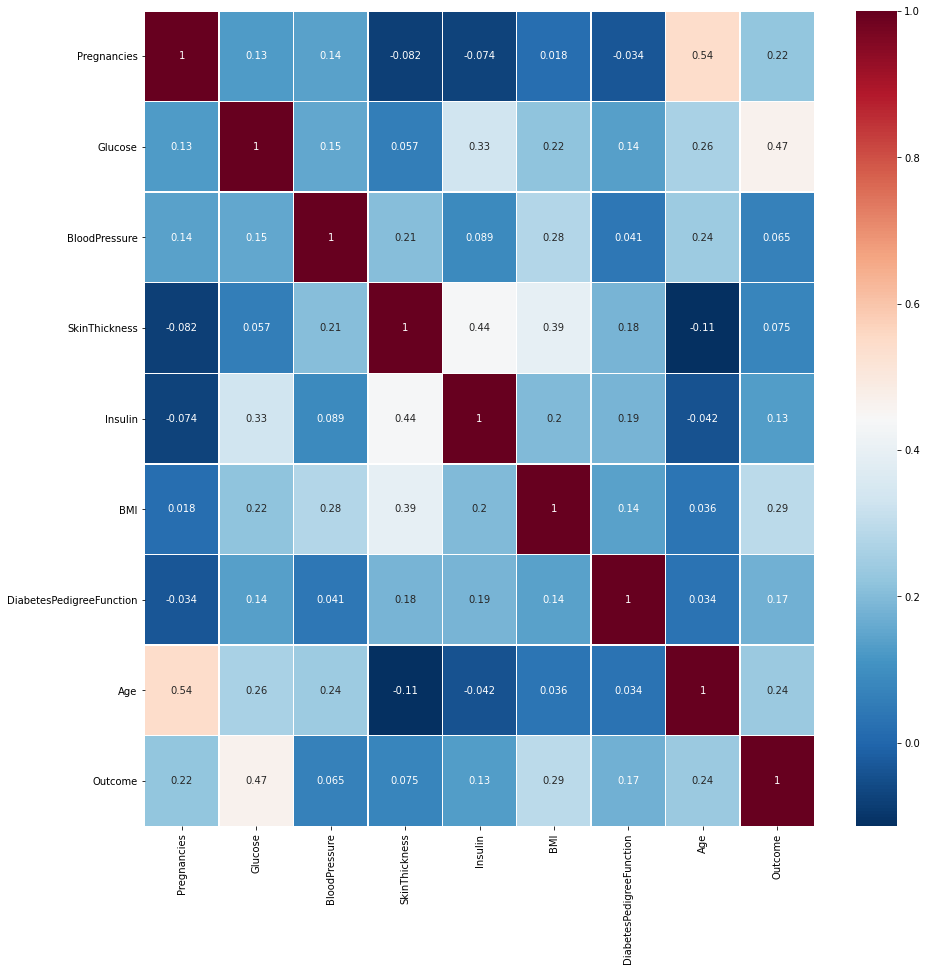

In [ ]:

import seaborn as sb

plt.figure(1,figsize=(15,15))
sb.heatmap(pearsoncorr, 
            xticklabels=pearsoncorr.columns,
            yticklabels=pearsoncorr.columns,
            cmap='RdBu_r',
            annot=True,
            linewidth=0.5)

In [ ]:
le = preprocessing.LabelEncoder()

labelencoderlist=['DiabetesPedigreeFunction','Pregnancies']

In [ ]:
le.fit(df.DiabetesPedigreeFunction)
df.DiabetesPedigreeFunction=le.transform(df.DiabetesPedigreeFunction)

le.fit(df.Pregnancies)
df.Pregnancies=le.transform(df.Pregnancies)


In [ ]:
Sum_of_squared_distances = []
K = range(1,10)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(df)
    Sum_of_squared_distances.append(km.inertia_)

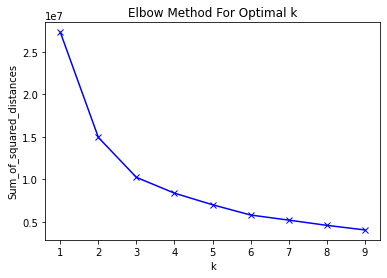

In [ ]:
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


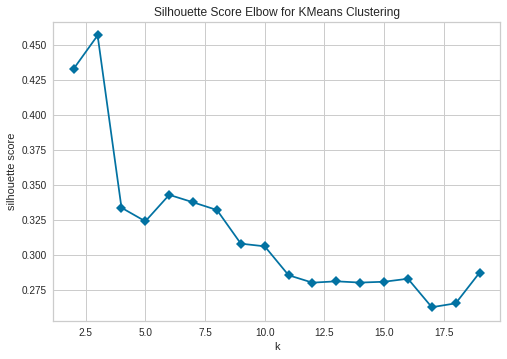

In [ ]:
from yellowbrick.cluster import KElbowVisualizer
model = KMeans(random_state=0)
visualizer = KElbowVisualizer(model, k=(2,20), metric='silhouette', timings=False)

visualizer.fit(df)    
visualizer.poof() 


In [ ]:
df2 = df[['DiabetesPedigreeFunction','Pregnancies']]
kmeans = KMeans(n_clusters=4)
y = kmeans.fit_predict(df)
print(df.head())

   Pregnancies  Glucose  BloodPressure  ...  DiabetesPedigreeFunction  Age  Outcome
0            6      148             72  ...                       350   50        1
1            1       85             66  ...                       196   31        0
2            8      183             64  ...                       368   32        1
3            1       89             66  ...                        53   21        0
4            0      137             40  ...                       514   33        1

[5 rows x 9 columns]


In [ ]:
kmeans.cluster_centers_

array([[3.66071429e+00, 1.55357143e+02, 7.24642857e+01, 3.23035714e+01,
        3.82125000e+02, 3.56196429e+01, 2.36464286e+02, 3.38750000e+01,
        5.53571429e-01],
       [4.13815789e+00, 1.16174342e+02, 6.81315789e+01, 1.55263158e+01,
        3.38618421e+01, 3.00967105e+01, 9.27960526e+01, 3.35263158e+01,
        2.53289474e-01],
       [3.86910995e+00, 1.25376963e+02, 7.02670157e+01, 2.34397906e+01,
        8.72041885e+01, 3.32937173e+01, 4.23518325e+02, 3.44607330e+01,
        4.81675393e-01],
       [3.45622120e+00, 1.14668203e+02, 6.85806452e+01, 2.19631336e+01,
        5.96175115e+01, 3.25672811e+01, 2.52036866e+02, 3.16036866e+01,
        3.13364055e-01]])

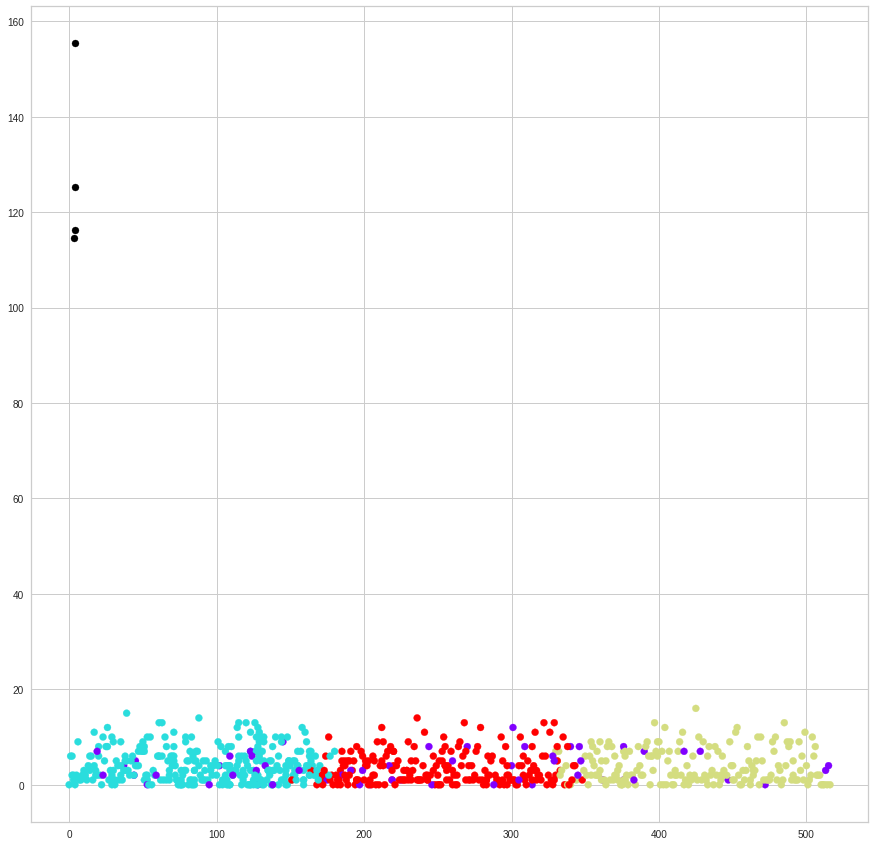

In [ ]:
plt.figure(1,figsize=(15,15))
plt.scatter(df2.DiabetesPedigreeFunction, df2.Pregnancies, c=kmeans.labels_, cmap='rainbow')
plt.scatter(kmeans.cluster_centers_[:,0] ,kmeans.cluster_centers_[:,1], color='black')

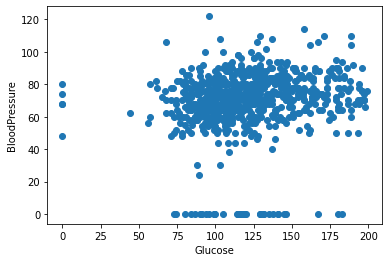

In [ ]:
plt.scatter(df['Glucose'], df['BloodPressure'])
plt.xlabel('Glucose')
plt.ylabel('BloodPressure')
plt.show()

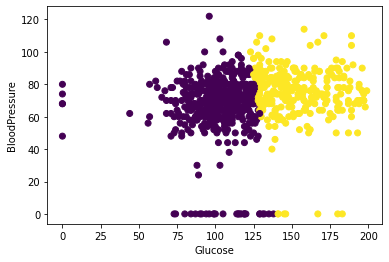

In [ ]:
# data2 create
df = df.loc[:, ['Glucose', 'BloodPressure']]
# KMEANS 2
kmeans2 = KMeans(n_clusters=2)
kmeans2.fit(df)
labels2 = kmeans2.predict(df)

# visualization
plt.scatter(df['Glucose'], df['BloodPressure'], c = labels2)
plt.xlabel('Glucose')
plt.ylabel('BloodPressure')
plt.show()

**Hierarchical clustering (not from scratch)**

In [8]:
# I have used the same dataset as before
dataset = df.loc[:, ['BloodPressure', 'DiabetesPedigreeFunction']]
data=data = df.loc[:, ['BloodPressure', 'DiabetesPedigreeFunction']]
from sklearn.preprocessing import normalize
data_scaled = normalize(dataset)
data_scaled = pd.DataFrame(data_scaled, columns=data.columns)
data_scaled.head()

,BloodPressure,DiabetesPedigreeFunction
0,0.999962,0.008708
1,0.999986,0.005318
2,0.999945,0.010499
3,0.999997,0.002530
4,0.998368,0.057107


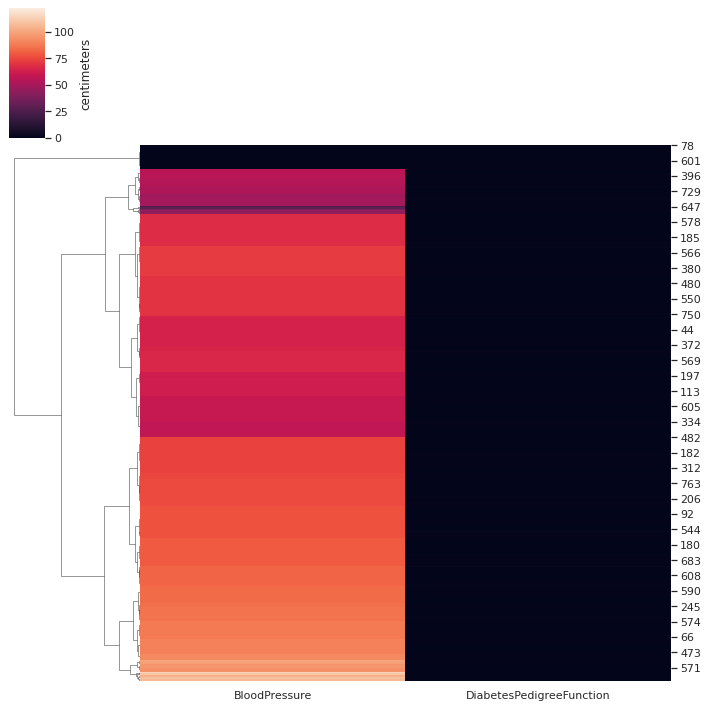

In [9]:
import seaborn as sns; sns.set(color_codes=True)
sns.clustermap(data, method="ward", col_cluster=False, cbar_kws={'label': 'centimeters'});
#plt.scatter(data_scaled['ApplicantIncome'], data_scaled['LoanAmount'], c=cluster.labels_)

** From the above heat map it is clear that there are 2 clusters.**

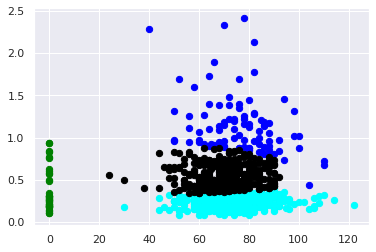

In [13]:
import sklearn.mixture
from sklearn.mixture import GaussianMixture
dataset = df.loc[:, ['BloodPressure', 'DiabetesPedigreeFunction']]
data.head(2)
X = data.values
gmm = GaussianMixture(n_components=4).fit(X)

#predictions from gmm
labels = gmm.predict(X)
frame = pd.DataFrame(X)
frame['cluster'] = labels
frame.columns = ['Weight', 'Height', 'cluster']

color=['blue','green','cyan', 'black']
for k in range(0,4):
    data = frame[frame["cluster"]==k]
    plt.scatter(data["Weight"],data["Height"],c=color[k],s=40,cmap='viridis')
plt.show()

**GMM**

In [14]:
probs = gmm.predict_proba(X)
print(probs[:5].round(3))

[[0.108 0.    0.    0.892]
 [0.028 0.    0.468 0.504]
 [0.097 0.    0.    0.903]
 [0.01  0.    0.916 0.074]
 [1.    0.    0.    0.   ]]


Visualizing uncertainty: by making the size of each point proportional to the certainty of its prediction

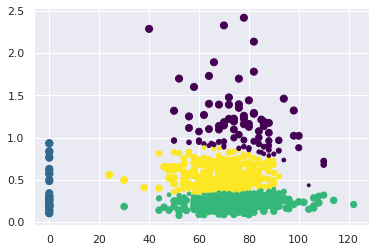

In [15]:
size = 50 * probs.max(1) ** 2  # square emphasizes differences
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=size);

Looking at the above figure, it's clear that it is precisely the points at the boundaries between clusters that reflect this uncertainty of cluster assignment.

**DB Scan Clustering (not from scratch) using pycaret library **

In [31]:
# Installing Pycaret
!pip3 install pycaret
import pycaret

In [20]:
data = df.sample(frac=0.95, random_state=786).reset_index(drop=True)
data_notused = df.drop(data.index).reset_index(drop=True)

print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_notused.shape))

Data for Modeling: (730, 9)
Unseen Data For Predictions: (38, 9)


***DBSCAN***

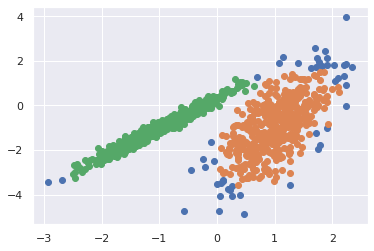

In [38]:
# dbscan clustering
from numpy import unique
from numpy import where
from sklearn.datasets import make_classification
from sklearn.cluster import DBSCAN
from matplotlib import pyplot
# define dataset
X, _ = make_classification(n_samples=1000, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1, random_state=4)
# define the model
model = DBSCAN(eps=0.30, min_samples=9)
# fit model and predict clusters
yhat = model.fit_predict(X)
# retrieve unique clusters
clusters = unique(yhat)
# create scatter plot for samples from each cluster
for cluster in clusters:
	# get row indexes for samples with this cluster
	row_ix = where(yhat == cluster)
	# create scatter of these samples
	pyplot.scatter(X[row_ix, 0], X[row_ix, 1])
# show the plot
pyplot.show()